Importing required libraries

In [34]:
# importing required libraries and datasets
import pandas as pd
import math
import numpy as np
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

nltk.download('stopwords')
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Reading CSV file

In [35]:


file_path = 'raw_reddit_data_filtered (1).csv'

# Reading the file using pandas
df = pd.read_csv(file_path)

# Print the first 10 comments
print(df.head(10))

   Unnamed: 0  Post_ID Comment_ID  \
0           1  108l3ho    j3vlnat   
1           2  10j6oqj    j5j34zb   
2           3  10j6oqj    j5jbs3f   
3           4  10j6oqj    j5jfczd   
4           5  10o9tvi    j6h1ko8   
5           6  10o9tvi    j88hrgq   
6           7  10o9tvi    jh0junq   
7           8  10o9tvi    j94k8o3   
8           9  10o9tvi    j94kbno   
9          10  10yjhn9    j7yqwxx   

                                             Comment Majority_Sentiment  
0  Some of them yes but this one i got it from my...            Neutral  
1        I keep mine in my phone cover for good luck           Positive  
2  Hang on to it! These are rare to come by as th...            Neutral  
3  Yeah?! Cool, I got this from my classmate in 2...           Positive  
4  Check out the Kaja Throm! Beautiful marketplac...           Positive  
5  Out of curiosity what field of work brings you...           Positive  
6  Definitely Dechenphu Lhakhang/Goenkhang! Seren...           Positive  


Preprocessing the data

In [36]:
import re
# We will do preprocessing by removing links, special characters(all except alphanumeric)
# regex_pattern_for_HTTPlinks = r'http\S+|www\S+|\@\w+|\#'
regex_pattern_for_HTTPlinks = r'http[s]?:\S+'
regex_pattern_for_WWWlinks = r'www\S+'
regex_for_removing_hashtags = r'#\S+'
all_characters_expect_alphanumeric = r'[^A-Za-z0-9\s]'

comments = []
processed_comments = []
for _, row in df.iterrows():
  comments += sent_tokenize(row["Comment"])

for comment in comments:
  comment = re.sub(regex_pattern_for_HTTPlinks, '', comment)
  comment = re.sub(regex_pattern_for_WWWlinks, '', comment)
  comment = re.sub(regex_for_removing_hashtags, '', comment)
  comment = re.sub(all_characters_expect_alphanumeric, '', comment)
  comment = comment.lower()
  comment = comment.strip().split(" ")
  for word in comment:
    if word in stopwords:
      comment.pop(comment.index(word))
  if (len(comment) > 0):
    processed_comments.append(comment)

In [37]:
# Set a random seed for reproducibility
np.random.seed(55)
processed_comments = np.array(processed_comments)
# Shuffle the sentences randomly
np.random.shuffle(processed_comments)

# Calculate the index for the split (80% for training)
split_index = int(0.8 * len(processed_comments))

# Split the data into training and testing sets
processed_corpus = list(processed_comments[:split_index])
processed_test = list(processed_comments[split_index:])

<ipython-input-37-c836f18293e6>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  processed_comments = np.array(processed_comments)


In [38]:
processed_corpus[:10]

[['like',
  'ive',
  'also',
  'started',
  'working',
  'definitely',
  'are',
  'lot',
  'aspects',
  'job',
  'dont',
  'use',
  'much',
  'math',
  'etc',
  'as',
  'per',
  'previous',
  'experience',
  'cant',
  'one',
  'expect',
  'find',
  'passion',
  'soon'],
 ['emoluments',
  'clause',
  'about',
  'personal',
  'profit',
  'ie',
  'a',
  'bribe',
  'paid',
  'him'],
 ['was',
  'business',
  'class',
  'air',
  'india',
  'domestic',
  'flight',
  'went',
  'use',
  'washroom'],
 ['too', 'fraught', 'any', 'true', 'blue', 'want', 'ccp'],
 ['want', 'facts', 'people', 'racist'],
 ['hello'],
 ['one',
  'them',
  'showed',
  'portugese',
  'worker',
  'a',
  'portugese',
  'factory',
  'lol'],
 ['parents',
  'are',
  'still',
  'living',
  'delusion',
  'wartime',
  'would',
  'blame',
  'the',
  'children',
  'being',
  'attached',
  'technology',
  'not',
  'to',
  'struggle',
  'school'],
 ['sorry',
  'color',
  'revolution',
  'failed',
  'dudes',
  'better',
  'luck',
  'ne

Lenght of train and test corpus

In [39]:
print(len(processed_corpus))
print(len(processed_test))

267513
66879


Fucntion for generating n grams within order n

In [40]:
from copy import deepcopy
def everygram_creator(order,processed_corpus):    # function for creating every  ngrams of length <= order

  copy_corpus = deepcopy(processed_corpus)  # creating copy of the dataset so  orginal do

  for i in range(len(copy_corpus)):
    # padding each sentence token according to order

    copy_corpus[i]  =  ["<s>"]*(order-1) + copy_corpus[i] + ["</s>"]*(order-1)

  #  creating n grams
  n_grams = []
  vocab =set()


  for sentence in copy_corpus:
    for token in sentence:
      vocab.add(token)

  for i in copy_corpus :
    grams = []
    for k in range(0,len(i)-order+1):
      window = i[k:k+order]    # creating a window of size == order
      for j in range(1,len(window)+1):
        grams.append(tuple(window[0:j]))  # creating every gram of lenght<= order
    n_grams.append(tuple(grams))

  return tuple(n_grams),vocab  # return a nested tuple containing all n-grams

# An example that how we will create all n grams starting from order 2 on first sentence of the corpus
print("Sentence:", processed_corpus[0:1])
print()
print("All bigrams and unigrams of the sentence-")
print(everygram_creator(2, processed_corpus[:1])[0])

Sentence: [['like', 'ive', 'also', 'started', 'working', 'definitely', 'are', 'lot', 'aspects', 'job', 'dont', 'use', 'much', 'math', 'etc', 'as', 'per', 'previous', 'experience', 'cant', 'one', 'expect', 'find', 'passion', 'soon']]

All bigrams and unigrams of the sentence-
((('<s>',), ('<s>', 'like'), ('like',), ('like', 'ive'), ('ive',), ('ive', 'also'), ('also',), ('also', 'started'), ('started',), ('started', 'working'), ('working',), ('working', 'definitely'), ('definitely',), ('definitely', 'are'), ('are',), ('are', 'lot'), ('lot',), ('lot', 'aspects'), ('aspects',), ('aspects', 'job'), ('job',), ('job', 'dont'), ('dont',), ('dont', 'use'), ('use',), ('use', 'much'), ('much',), ('much', 'math'), ('math',), ('math', 'etc'), ('etc',), ('etc', 'as'), ('as',), ('as', 'per'), ('per',), ('per', 'previous'), ('previous',), ('previous', 'experience'), ('experience',), ('experience', 'cant'), ('cant',), ('cant', 'one'), ('one',), ('one', 'expect'), ('expect',), ('expect', 'find'), ('find

In [41]:
# Creating a dataset for visualizing the trend of average perplexity scores
perplexity_data = {"train_perp_without_LPsmoothing": [],
                   "train_perp_with_LPsmoothing": [],
                   "test_perp_with_LPsmoothing": []}

Average perplexity of a Unigram LM without smoothing on the train dataset

In [42]:
class UnigramModel:

    def __init__(self):
        self.unigram_freq = {}
        self.total_tokens = 0

    def fit(self, processed_corpus):
        for sentence in processed_corpus:
            for token in sentence:
              self.total_tokens += 1
              if token in self.unigram_freq:
                  self.unigram_freq[token] += 1
              else:
                  self.unigram_freq[token] = 1

    def unigram_probability(self, token):
        if token in self.unigram_freq:
            return np.log2(self.unigram_freq[token]) - np.log2(self.total_tokens)
        else:
            return np.log2(1e-25)

    def perplexity(self, processed_test):
        perplexity_values = []
        for sentence in processed_test:
            if len(sentence) > 0:
                sentence_probability = 0.0
                for token in sentence:
                    token_probability = self.unigram_probability(token)
                    sentence_probability += token_probability
                perplexity_values.append(2 ** (-sentence_probability/len(sentence)))

        if len(perplexity_values) > 0:
            return sum(perplexity_values) / len(perplexity_values)


model = UnigramModel()
model.fit(processed_corpus[:])

#Perplexity of unsmoothed unigram on test data
perplexity = model.perplexity(processed_test[:])
print("Average perplexity of a Unigram model on the test dataset:", perplexity)

# Perplexity on train
perplexity = model.perplexity(processed_corpus[:])
print("Average perplexity of a Unigram model on the train dataset:", perplexity)
perplexity_data["train_perp_without_LPsmoothing"].append(perplexity)

Average perplexity of a Unigram model on the test dataset: 1.928954909021104e+22
Average perplexity of a Unigram model on the train dataset: 15413.773171968316


Unigram with Laplace smoothing

In [43]:
class UnigramSmoothedModel:

    def __init__(self):
      self.unigram_freq = {}
      self.total_tokens = 0
      self.vocab = set()


    def fit(self, processed_corpus):
        for sentence in processed_corpus:
            for token in sentence:
                self.total_tokens += 1
                if token in self.unigram_freq:
                    self.unigram_freq[token] += 1
                else:
                    self.unigram_freq[token] = 1
                    self.vocab.add(token)

    def unigram_probability(self, token):
        if token in self.unigram_freq:
            return np.log2(self.unigram_freq[token]) - np.log2(self.total_tokens)
        else:
            return -np.log2(self.total_tokens + len(self.vocab))

    def perplexity(self, processed_test):
        perplexity_values = []
        for sentence in processed_test:
            if len(sentence) > 0:
                sentence_probability = 0.0
                for token in sentence:
                    token_probability = self.unigram_probability(token)
                    sentence_probability += token_probability
                perplexity_values.append(2 ** (-sentence_probability/len(sentence)))

        if len(perplexity_values) > 0:
            return sum(perplexity_values) / len(perplexity_values)

model = UnigramSmoothedModel()
model.fit(processed_corpus)

perplexity = model.perplexity(processed_test)
print("Average perplexity of a Smoothed Unigram model on the test dataset:", perplexity)
perplexity_data["test_perp_with_LPsmoothing"].append(perplexity)

Average perplexity of a Smoothed Unigram model on the test dataset: 18661.150685529396


N grams generalized class for bigram, trigram, and quadgram

In [44]:
class ngram():

  def __init__(self, order):
    self.everygram_to_freq = None
    self.unigram_count = 0
    self.vocab = None
    self.order = order

  def fit(self, processed_corpus):

    train, vocab = everygram_creator(self.order, processed_corpus)  # creating n-grams of length <= order
    self.vocab = vocab
    everygram = []
    for i in train:
        everygram.extend(list(i))
    self.everygram_to_freq = {}

    # mapping every n gram to its frequency
    for i in everygram:
      if len(i) == 1:
        self.unigram_count += 1

      if i not in self.everygram_to_freq:
        self.everygram_to_freq[i] = 1
      else:
        self.everygram_to_freq[i] += 1

  def log_prob(self, sentence):

    test,v = everygram_creator(self.order, [sentence])
    grams = []
    for i in test:
      grams.extend(list(i))
    ind = []

    for i in range(len(grams)):
      if len(grams[i]) < self.order:
        ind.append(i)  # storing indices of n grams

    # finding log probability to prevent overflow or underflow error
    log_prob_sen = 0
    for i in range(len(grams)):
      if i in ind:
        continue
      gram = list(grams[i])
      prob_gram = 0
      if tuple(gram) in self.everygram_to_freq:
        if len(gram) >= 2:  # calculating n-gram conditional probability
          prob_gram = np.log2(self.everygram_to_freq[tuple(gram)]) - np.log2(self.everygram_to_freq[tuple(gram[0:-1])])
        elif len(gram) == 1:  # counting unigram probability for a unigram
          prob_gram = np.log2(self.everygram_to_freq[tuple(gram)]) - np.log2(self.unigram_count)

      else:
        prob_gram = np.log2(1e-25)
      log_prob_sen += prob_gram
    return log_prob_sen


  def perplexity(self, processed_test):
    perplexity_values = []
    for tokens in processed_test:
      n = len(tokens)
      if n >=1:
        score = self.log_prob(tokens)
        score = 2**(-score/n)  # taking antilog to find initial perplexity

        perplexity_values.append(score)

    perplexity = np.mean(perplexity_values) # taking the average of all perplexities
    return perplexity

Average perplexity of a Unigram model on the train dataset(unsmoothed)

In [45]:
model = ngram(1)
model.fit(processed_corpus[:])
perplexity = model.perplexity(processed_corpus[:])
print("Average perplexity of a Unigram model on the train dataset(unsmoothed):", perplexity)

Average perplexity of a Unigram model on the train dataset(unsmoothed): 15413.773171965984


Average perplexity of the train dataset for bigram LM(unsmoothed)

In [46]:
model = ngram(2)
model.fit(processed_corpus[:])
perplexity = model.perplexity(processed_corpus[:])
print("Average perplexity of a Bigram model on the train dataset(unsmoothed):", perplexity)
perplexity_data["train_perp_without_LPsmoothing"].append(perplexity)

Average perplexity of a Bigram model on the train dataset(unsmoothed): 4872.25445044817


Average perplexity of a Trigram model on the train dataset(unsmoothed)

In [47]:
model = ngram(3)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_corpus)
print("Average perplexity of a Trigram model on the train dataset(unsmoothed):", perplexity)
perplexity_data["train_perp_without_LPsmoothing"].append(perplexity)

Average perplexity of a Trigram model on the train dataset(unsmoothed): 2774.575166751096


Average perplexity of a Quadgram model on the train dataset(unsmoothed)

In [48]:
model = ngram(4)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_corpus)
print("Average perplexity of a Quadgram model on the train dataset(unsmoothed):", perplexity)
perplexity_data["train_perp_without_LPsmoothing"].append(perplexity)

Average perplexity of a Quadgram model on the train dataset(unsmoothed): 2761.0489256891287


Ideally, when we try to get perplexity scores of these unsmoothed (Uni, Bi, Tri, Quad) Language Models on the test dataset, the scores should approach infinity because:
- These LMs are fitted on the train dataset. Hence, there are many n-grams in the test dataset that do not occur in traina and hence will have probability = 0 according to the LMs.
- This will lead to 0 in denominator of the perplexity formula and perplexity will reach infinity.
- To avoid ''' Division by Zero error''', we give a very less probability (of order e<sup>-25</sup>) to all those n-grams that have a probability = 0.
- Hence, we can see that the perplexity scores are very high(approaching infinity) in the order of e<sup>30</sup> for all unsmoothed LMs just as expected.

Unsmoothed Bigram model on test dataset

In [49]:
model = ngram(2)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_test)
print(perplexity)

2.093332735238416e+47


Unsmoothed Trigram model on test dataset

In [50]:
model = ngram(3)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_test)
print(perplexity)

2.0933327352383132e+72


Unsmoothed Quadgram model on test dataset

In [51]:
model = ngram(4)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_test)
print(perplexity)

2.093332735238301e+97


#Smoothing of N-grams (bigrams, trigrams, quadgram)

In [52]:
class ngram_smoothed():

  def __init__(self, order):
    self.everygram_to_freq = None
    self.unigram_count = 0
    self.vocab = None
    self.order = order

  def fit(self, processed_corpus):

    train, vocab = everygram_creator(self.order, processed_corpus)  # creating n-grams of length <= order
    self.vocab = vocab
    everygram = []
    for i in train:
        everygram.extend(list(i))
    self.everygram_to_freq = {}

    # mapping every n gram to its frequency
    for i in everygram:
      if len(i) == 1:
        self.unigram_count += 1

      if i not in self.everygram_to_freq:
        self.everygram_to_freq[i] = 1
      else:
        self.everygram_to_freq[i] += 1

  def log_prob(self, sentence):

    test,v = everygram_creator(self.order, [sentence])
    grams = []
    # grams = list(test)
    for i in test:
      grams.extend(list(i))
    ind = []

    for i in range(len(grams)):
      if len(grams[i]) == self.order:
        ind.append(i)  # storing indices of n grams

    log_prob_sen = 0
    for i in ind:
      gram = list(grams[i])
      prob_gram = 0
      if tuple(gram) in self.everygram_to_freq:

        if len(gram) >= 2:  # calculating n-gram conditional probability
          prob_gram = np.log2(self.everygram_to_freq[tuple(gram)] + 1) - np.log2(self.everygram_to_freq[tuple(gram[0:-1])] + len(v)-2)

        elif len(gram) == 1:  # counting unigram probability for a unigram
        # Incrementing numerater by 1 and denominator by V = size of the vocabulary
          prob_gram = np.log2(self.everygram_to_freq[tuple(gram)] + 1) - np.log2(self.unigram_count + len(self.vocab))
      else:
        if (len(gram) >= 2):
          if (tuple(gram[0:-1]) in self.everygram_to_freq):
            prob_gram = -np.log2(self.everygram_to_freq[tuple(gram[0:-1])] + len(v)-2)
          else:
            prob_gram = -np.log2(len(v)-2)
        else:
          prob_gram = -np.log2(self.unigram_count + len(self.vocab))
      log_prob_sen += prob_gram
    return log_prob_sen


  def perplexity(self, processed_test):
    perplexity_values = []
    for tokens in processed_test:
      n = len(tokens)
      if n >=1:
        score = self.log_prob(tokens)
        score = 2**(-score/n)  # taking antilog to find initial perplexity

        perplexity_values.append(score)

    perplexity = np.mean(perplexity_values) # taking the average of all perplexities
    return perplexity

With smoothing on bigrams

In [53]:
model = ngram_smoothed(2)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_test)
print("Average perplexity of test dataset on Laplace smoothed bigram fitted on train dataset:", perplexity)
perplexity_data["test_perp_with_LPsmoothing"].append(perplexity)

Average perplexity of test dataset on Laplace smoothed bigram fitted on train dataset: 5452.083136960607


Smotthing on trigrams

In [54]:
model = ngram_smoothed(3)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_test)
print("Average perplexity of test dataset on Laplace smoothed trigram fitted on train dataset:",perplexity)
perplexity_data["test_perp_with_LPsmoothing"].append(perplexity)

Average perplexity of test dataset on Laplace smoothed trigram fitted on train dataset: 2866.694136155986


Smotthing on Quadgrams

In [55]:
model = ngram_smoothed(4)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_test)
print("Average perplexity of test dataset on Laplace smoothed quadgram fitted on train dataset:",perplexity)
perplexity_data["test_perp_with_LPsmoothing"].append(perplexity)

Average perplexity of test dataset on Laplace smoothed quadgram fitted on train dataset: 2871.570054237034


In [56]:
# Smoothed LMs on train data
model = ngram_smoothed(1)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_corpus)
print("Average perplexity of test dataset on Laplace smoothed unigram fitted on train dataset:",perplexity)
perplexity_data["train_perp_with_LPsmoothing"].append(perplexity)

print("---------------------------------------------------------")

model = ngram_smoothed(2)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_corpus)
print("Average perplexity of test dataset on Laplace smoothed bigram fitted on train dataset:",perplexity)
perplexity_data["train_perp_with_LPsmoothing"].append(perplexity)

print("---------------------------------------------------------")

model = ngram_smoothed(3)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_corpus)
print("Average perplexity of test dataset on Laplace smoothed trigram fitted on train dataset:",perplexity)
perplexity_data["train_perp_with_LPsmoothing"].append(perplexity)

print("---------------------------------------------------------")

model = ngram_smoothed(4)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_corpus)
print("Average perplexity of test dataset on Laplace smoothed quadgram fitted on train dataset:",perplexity)
perplexity_data["train_perp_with_LPsmoothing"].append(perplexity)

print("---------------------------------------------------------")

Average perplexity of test dataset on Laplace smoothed unigram fitted on train dataset: 12018.013390078971
---------------------------------------------------------
Average perplexity of test dataset on Laplace smoothed bigram fitted on train dataset: 2962.325915340637
---------------------------------------------------------
Average perplexity of test dataset on Laplace smoothed trigram fitted on train dataset: 1697.087153790053
---------------------------------------------------------
Average perplexity of test dataset on Laplace smoothed quadgram fitted on train dataset: 1695.1259393328974
---------------------------------------------------------


Plotting the trend of average perplexity scores on the train dataset on Unsmoothed Language models

In [57]:
perp_df = pd.DataFrame(perplexity_data)
perp_df.index = ["unigram", "bigram", "trigram", "quadgram"]
print(perp_df)

          train_perp_without_LPsmoothing  train_perp_with_LPsmoothing  \
unigram                     15413.773172                 12018.013390   
bigram                       4872.254450                  2962.325915   
trigram                      2774.575167                  1697.087154   
quadgram                     2761.048926                  1695.125939   

          test_perp_with_LPsmoothing  
unigram                 18661.150686  
bigram                   5452.083137  
trigram                  2866.694136  
quadgram                 2871.570054  


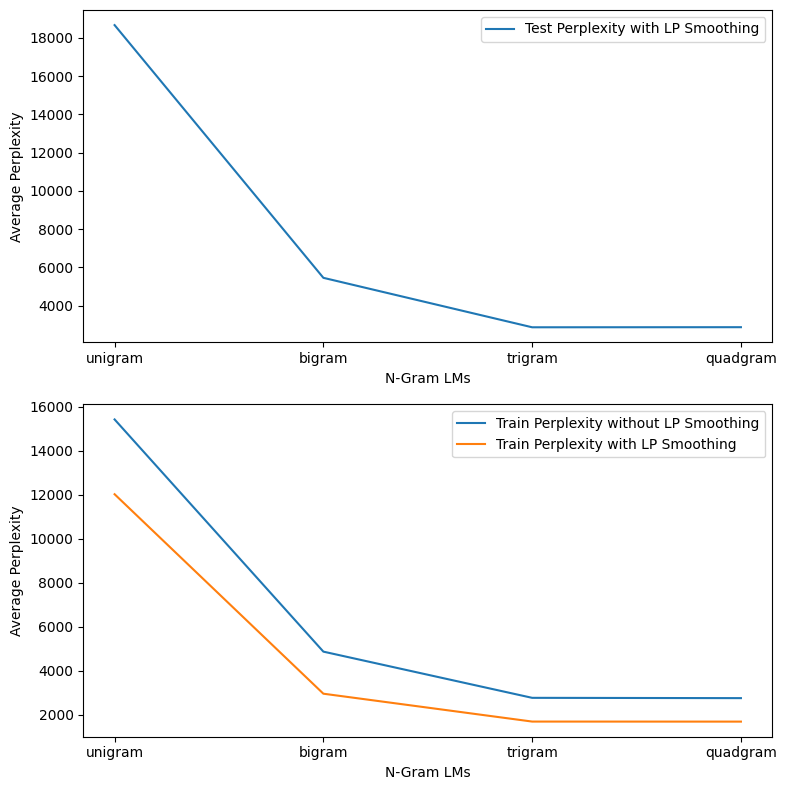

In [58]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot test_perp_with_LPsmoothing on one plot
ax1.plot( perp_df.index, perplexity_data["test_perp_with_LPsmoothing"], label="Test Perplexity with LP Smoothing")
ax1.set_xlabel("N-Gram LMs")
ax1.set_ylabel("Average Perplexity")
ax1.legend()

# Plot train_perp_without_LPsmoothing and train_perp_with_LPsmoothing on another plot
ax2.plot(perp_df.index, perplexity_data["train_perp_without_LPsmoothing"], label="Train Perplexity without LP Smoothing")
ax2.plot(perp_df.index, perplexity_data["train_perp_with_LPsmoothing"], label="Train Perplexity with LP Smoothing")
ax2.set_xlabel("N-Gram LMs")
ax2.set_ylabel("Average Perplexity")
ax2.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()
